In [1]:
from PyPDF2 import PdfReader
import re

def extract_text_from_pdf(pdf_path):
    text = ""
    with open(pdf_path, 'rb') as file:
        reader = PdfReader(file)
        for page in reader.pages:
            text += page.extract_text()
    return text


In [126]:
matches = re.search(r'fatality.(.*?\n?.*?\n?.*?\n)(\d+)%(.*?\n?.*?\n?.*?\n)?(\d+)?%', m)
matches.group(4)

'17'

In [356]:
for i in sector_names:
    file_text = extract_text_from_pdf(i[0:5] + '_2018.pdf')

    commonly_injured_parts = None
    step = 0

    # Step 1
    matches = re.findall(r'were injured\n(.*?\n.*?\n.*?\n)(\d+)%\n(.*?)\n(\d+)%\n(.*?\n.*?\n)(\d+)%', file_text)
    if matches and len(matches[0]) == 6 :
        step = 1
        commonly_injured_parts = {
            matches[0][0].strip().replace('\n', ''): int(matches[0][1]),
            matches[0][2].strip().replace('\n', ''): int(matches[0][3]),
            matches[0][4].strip().replace('\n', ''): int(matches[0][5])
        }
    else:
        # Step 2
        matches = re.findall(r'injured\n(.*?\n?.*?)\n(\d+)%(.*?\n.*?\n?.*?)\n(\d+)%', file_text)
        matches.extend(re.findall(r'fatality.(.*?\n.*?\n.*?)\n(\d+)%', file_text))
        matches= [sum(matches,())]
        if matches and len(matches[0]) == 6 and i[0:5]!='Trans':
            print(i[0:5])
            step = 2
            matches = [sum(matches, ())]
            commonly_injured_parts = {
                matches[0][0].strip().replace('\n', ''): int(matches[0][1]),
                matches[0][2].strip().replace('\n', ''): int(matches[0][3]),
                matches[0][4].strip().replace('\n', ''): int(matches[0][5])
            }
        else:
            # Step 3
            matches = re.findall(r'were injured\n(.*?\n.*?\n.*?\n)(\d+)%\n', file_text)
            matches.extend(re.findall(r'fatality.(.*?)\n(\d+)%(.*?\n.*?\n.*?)\n(\d+)%', file_text))
            matches= [sum(matches,())]
            if matches and len(matches[0]) == 6 :
                step = 3
                matches = [sum(matches, ())]
                commonly_injured_parts = {
                    matches[0][0].strip().replace('\n', ''): int(matches[0][1]),
                    matches[0][2].strip().replace('\n', ''): int(matches[0][3]),
                    matches[0][4].strip().replace('\n', ''): int(matches[0][5])
                }
            else:
                # Step 4
                matches = re.findall(r'injured\n\d+?%(.*?\n.*?\n.*?)\n(\d+)%(.*?\n.*?)\n(\d+)%\n', file_text)
                matches.extend(re.findall(r'fatality.(.*?\n.*?\n.*?)\n(\d+)%', file_text))
                matches= [sum(matches,())]
                if matches and len(matches[0]) == 6:
                    step = 4
                    matches = [sum(matches, ())]
                    commonly_injured_parts = {
                        matches[0][0].strip().replace('\n', ''): int(matches[0][1]),
                        matches[0][2].strip().replace('\n', ''): int(matches[0][3]),
                        matches[0][4].strip().replace('\n', ''): int(matches[0][5])
                    }
                else:
                    # Step 5
                    matches = re.findall(r'injured(.*?\n.*?)\n(\d+)%\n(.*?\n.*?\n.*?)\n(\d+)%', file_text)
                    matches.extend(re.findall(r'fatality.(.*?\n.*?\n.*?)\n(\d+)%', file_text))
                    matches= [sum(matches,())]
                    if matches and len(matches[0]) == 6:
                        step = 5
                        matches = [sum(matches, ())]
                        commonly_injured_parts = {
                            matches[0][0].strip().replace('\n', ''): int(matches[0][1]),
                            matches[0][2].strip().replace('\n', ''): int(matches[0][3]),
                            matches[0][4].strip().replace('\n', ''): int(matches[0][5])
                        }
                    else:
                        # Step 6
                        matches = re.findall(r'were injured\n(.*?)\n(\d+)%\n', file_text)
                        matches.extend(re.findall(r'fatality.(.*?\n.*?\n.*?)\n(\d+)%(.*?\n.*?\n.*?)\n(\d+)%', file_text))
                        matches= [sum(matches,())]
                        
                        if matches and len(matches[0]) == 6:
                            step = 6
                            matches = [sum(matches, ())]
                            commonly_injured_parts = {
                                matches[0][0].strip().replace('\n', ''): int(matches[0][1]),
                                matches[0][2].strip().replace('\n', ''): int(matches[0][3]),
                                matches[0][4].strip().replace('\n', ''): int(matches[0][5])
                            }
                        else:
                            # Step 7
                            matches = re.findall(r'were injured\n\d+%(.*?\n.*?\n.*?)\n(\d+)%\n', file_text)
                            matches.extend(re.findall(r'fatality.(.*?\n.*?)\n(\d+)%\n(.*?\n.*?\n.*?)\n(\d+)%', file_text))
                            matches= [sum(matches,())]
                            if matches and len(matches[0]) == 6:
                                step = 7
                                matches = [sum(matches, ())]
                                commonly_injured_parts = {
                                    matches[0][0].strip().replace('\n', ''): int(matches[0][1]),
                                    matches[0][2].strip().replace('\n', ''): int(matches[0][3]),
                                    matches[0][4].strip().replace('\n', ''): int(matches[0][5])
                                }

    if commonly_injured_parts:
        print(f"The step it was gotten is: {step}")
        print(commonly_injured_parts)
    else:
        print("No matches found in any step")

The step it was gotten is: 1
{'Backincluding spine,spinal cord': 13, 'Legs': 14, 'Ankle(s), Foot (feet)except toes': 11}
The step it was gotten is: 4
{'Wrist(s) and Hand(s) except ﬁnger(s)': 14, 'Finger(s),ﬁngernail(s)': 11, 'Backincluding spine,spinal cord': 18}
Const
The step it was gotten is: 2
{'Leg(s)': 12, 'Finger(s),ﬁngernails': 11, 'Backincluding spine,spinal cord': 20}
Provi
The step it was gotten is: 2
{'Leg(s)': 9, 'Wrist(s) and hand(s) except ﬁnger(s)': 8, 'Backincluding spine,spinal cord': 23}
The step it was gotten is: 7
{'Wrist(s) and hand(s) except ﬁnger(s)': 13, 'Finger(s),ﬁngernails': 15, 'Backincluding spine,spinal cord': 19}
The step it was gotten is: 3
{'Ankle(s) and foot except toes': 12, 'Leg(s)': 13, 'Backincluding spine,spinal cord': 17}
The step it was gotten is: 6
{'Leg(s)': 11, 'Backincluding spine,spinal cord': 24, 'Ankle(s), Foot (feet)except toes': 10}
The step it was gotten is: 5
{'Finger(s), ﬁngernail(s)': 9, 'Wrist(s) and hand(s) except ﬁnger(s)': 10, 

In [439]:
sector_names

['Agriculture & forestry',
 'Business & professional services',
 'Construction & construction trades',
 'Provincial & municipal government, education & health',
 'Manufacturing, packaging & processing',
 'Mining & petroleum development',
 'Transportation, communication & utilities',
 'Wholesale and retail']

In [441]:
for i in sector_names:
    o= extract_text_from_pdf(i[0:5]+'_2018.pdf')
    a= re.findall(r'(\d+)%', re.findall(r'were injured\n?([\s\S]+?)All numbers',o)[0])
    print(nos_btw_21_and_32(a))

1
[26]
1
[25, 25]
1
[31]
1
[24, 24]
1
[25]
1
[30]
1
[23]
1
[22]


In [453]:
def nos_btw_21_and_32(string_list):
    result = []
    for string in string_list:
        numbers = re.findall(r'\b(?:2[1-9]|[3][0-2])\b', string)
        result.extend(map(int, numbers))
    return result

def extract_age_percent(file_text):
    agegroup = re.findall(r'\s?(\d+-\d+)', file_text)
    percent = re.findall(r'(\d+)%', re.findall(r'were injured\n?([\s\S]+?)All numbers', file_text)[0])
    percent=nos_btw_21_and_32(percent)
    print(percent)
    result = {age: per for age, per in zip(agegroup, percent)}
    return result

extract_age_percent(m)


[24, 24]


{'35-44': 24, '45-54': 24}

In [452]:
m= extract_text_from_pdf("provi_2018.pdf") 
m          

'Top three causes of \ninjuries among workers \nOverexertion 24%\nFalls 19%\nBodily reaction     13%Common types of injuries\nSprains / Strains / Tears 57%\nSuperﬁcial wounds 10%\nFractures/ Dislocations/ \nNerve damage    5%Commonly injured \nparts of the body\nOccupations with higher injuries\nRegistered nurses \n& registered \npsychiatric nurses\n7%Nurse aides, \norderlies, etc.\n19%Social & \ncommunity \nservice workers\n6%Injuries by gender\nAge with \nhighest \ninjury \nclaims 35-44 \nyears\n45-54\nyearsWorkplace injuries, diseases & fatalities in Alberta\nProvincial & municipal government, education & health sector overview 2018 \nData reﬂects 2018 injury, disease and fatality statistics as accepted and reported by the Workers’ Compensation Board of Alberta.18\nNumber of \nworkers \nwho died1\n12Disease\n2\nMotor vehicle incidents\n4Workplace incidents11,953\nInjury claims by workers in 2018\nApproximately 3 in 100 \nworkers were injured\nLeg(s)\n9%Wrist(s) and \nhand(s) except 

In [447]:
n= extract_text_from_pdf("const_2018.pdf")
n

'Top three causes of \ninjuries among workers \nFalls  21%\nOverexertion  18%\nStruck by object    15%49%\n12%Common types of injuries \nSprains/ Strains/ Tears   \nOpen wounds  \nSuperﬁcial wounds 11%Commonly injured \nparts of the body\nOccupations with higher injuries\nCarpenters\n8%Construction \ntrades helpers \n& workers\n13%Heavy \nequipment \noperator\n5%Age with \nhighest injury claims 25-34\nyearsWorkplace injuries, diseases & fatalities in Alberta\nConstruction & construction trades sector overview 2018 \nData reﬂects 2017 injury, disease and fatality statistics as accepted and reported by the Workers’ Compensation Board of Alberta.43\nNumber of \nworkers \nwho died1\n24Disease\n7\nMotorvehicleincidents\n12Workplace incidents9,309\nInjury claims by workers in 2018\nApproximately 3 in 100 \nworkers were injured\nLeg(s)\n12%Finger(s),\nﬁngernails\n11%\n31%\n      91%\nmale 9%\n femaleInjuries by gender\n1All numbers are based on the year of the fatality.Back\nincluding spine,\

In [446]:
o= extract_text_from_pdf("busin_2018.pdf")
o

'Top three causes of \ninjuries among workers \nFalls  22%\nOverexertion 16%\nBodily reaction     13%Common types of injuries\nSprains/ Strains/ Tears 47%\nOpen wounds  12%\nSuper/f_icial wounds 10%Commonly injured \nparts of the body\nOccupations with higher injuries\nCooks\n11%Attendants, \nhelpers & \nrelated jobs \n12%Light duty \ncleaners\n8%\n45%\n male55%\n femaleInjuries by gender\nAge with highest injury claims \n25-34\nyearsWorkplace injuries, diseases & fatalities in Alberta\nBusiness and professional services sector overview 2018\nData reﬂects 2018 injury, disease and fatality statistics as accepted and reported by the Workers’ Compensation Board of Alberta.4\nNumber of \nworkers \nwho died1\n1Disease\n2\nMotorvehicleincidents\n1Workplace incidents5,947\nInjury claims by workers in 2018\nApproximately 2 in 100 \nworkers were injured\n25%Wrist(s) and \nHand(s) except \nﬁnger(s)\n14%Finger(s),\nﬁngernail(s)\n11%\n25%15-24\nyears\n1All numbers are based on the year of the fata

In [40]:
match = re.search(r'(\d+)%\n(\d+)%Common types of injuries \n(.*?)\s{3}\n(.*?)  \n(.*?)\s(\d+)%Commonly', m)
match.group(1)

'49'

In [227]:
match= re.search(r'\n100 workers were injured\n(.*?)\n(\d{1,2})%\n?\d{0,2}%?(.*?)\n(\d{1,2})%\n?(.*?)\n(\d{1,2})%', n)
match.group(6)

'10'

In [159]:
match= re.search(r'\nclaims (.*?) \nyearsWorkplace injuries',o)
match.group(1)

'25-34'

In [166]:
find_age_groups(n)

['35-44']

In [177]:
def extract_age_group_percentages(text):
    age_groups = find_age_groups(text)
    age_group_percent = {}

    if len(age_groups) == 1:
        # First pattern to search for percentage
        match = re.search(r'%\n{0,1}(\d{2})%\n\d{1,2}%\n\s{1,6}male', text)
        if not match:
            # Second pattern if no value is found
            match = re.search(r'(\d{1,2})%.*?\n\d{1,2}%.*?\n{0,1}\d{2}%\n\d{1,2}%\n\s{1,6}male', text)
        if not match:
            # Third pattern if still no value is found
            match = re.search(r'(\d*)%Injuries by gender', text)

        if match:
            age_group_percent[age_groups[0]] = match.group(1)

    elif len(age_groups) == 2:
        # Pattern to search for percentages for two age groups
        match = re.search(r'\n(\d{1,2})%.*?\n\d{1,2}%.*?\n\d{1,2}%\n(\d{1,2})%\d{1,2}-\d{1,2}\nyears\n\d{1,2}All fatality', text)
        
        if match:
            age_group_percent[age_groups[0]] = match.group(1)
            age_group_percent[age_groups[1]] = match.group(2)

    return age_group_percent


In [178]:
extract_age_group_percentages(o)

{'25-34': '25', '15-24': '25'}

In [182]:
 match = re.search(r'%\n{0,1}(\d{2})%\n\d{1,2}%\n\s{1,6}male', file_text)
match=re.search(r'(\d{1,2})%.*?\n\d{1,2}%.*?\n{0,1}\d{2}%\n\d{1,2}%\n\s{1,6}male',n) #if %=6
match=re.search(r'(\d*)%Injuries by gender',n) #if %=4
match=re.search(r'\n(\d{1,2})%.*?\n\d{1,2}%.*?\n\d{1,2}%\n(\d{1,2})%\d{1,2}-\d{1,2}\nyears\n\d{1,2}All fatality',o) 
match=re.search(r'(\d{1,2})%.*?\n\d{1,2}%.*?\n{0,1}\d{2}%\n\d{1,2}%\n\s{1,6}male',n) #if %=6
match=re.search(r'(\d*)%Injuries by gender',n) #if %=4
match=re.search(r'\n(\d{1,2})%.*?\n\d{1,2}%.*?\n\d{1,2}%\n(\d{1,2})%\d{1,2}-\d{1,2}\nyears\n\d{1,2}All fatality',o) #if %=5
match.group(2),match.group(1)

In [128]:
o =extract_text_from_pdf("busin_2017.pdf")
o  

'Top three causes of \ninjuries among workers \nFalls  20%\nOverexertion 16%\nBodily reaction     14%Common types of injuries\nSprain / Strain / Tear   48%\nOpen wounds   12%\nSuperﬁcial wounds  10%Commonly injured \nparts of the body\nOccupations with higher injuries\nCooks\n10%Attendants, \nhelpers & \nrelated jobs  \n13%Light duty \ncleaners\n10%\n44%\n     male56%\n femaleInjuries by gender\nAge with \nhighest \ninjury \nclaims 25-34 \nyearsWorkplace injuries, diseases & fatalities in Alberta\nBusiness and professional services overview 2017 \nData reﬂects 2017 injury, disease and fatality statistics as accepted and reported by the Workers’ Compensation Board of Alberta.3\nNumber of \nworkers \nwho died1\n1Disease\n1\nMotor vehicle incidents\n1Workplace incidents5,791\nInjury claims by workers in 2017\nApproximately two in \n100 workers were injured\nBack\n19%\n25%Hands\n14%Fingers\n11%\n25%15-24\nyears\n1All fatality numbers in this report are based on the year the worker died.  '

injuries\n()(d)%\n()(d)%\n()(d)%Commonly

In [5]:
match = re.search(r'Alberta\.(\d+)\nNumber of \nworkers \nwho died1', n)
if match:
    workers_died = match.group(1)
workers_died

'3'

In [32]:
match = re.search(r'\n\d{1,2}Workplace incidents(\d{1,3}(?:,\d{3})?)\nInjury', o)
print(match)
if match:
    workers_injured = match.group(1).replace(',', '')

workers_injured


<re.Match object; span=(693, 727), match='\n17Workplace incidents9,089\nInjury'>


'9089'

In [59]:
match = re.search(r'(\d{1,2})%\n\s{1,6}male\s{0,1}(\d{1,3})%\n\s{1,4}female', o)
print(match)
if match:
    male_percentage = int(match.group(1))
    female_percentage = int(match.group(2))
    injuries_by_gender = {'male': male_percentage, 'female': female_percentage}
injuries_by_gender

<re.Match object; span=(847, 873), match='84%\n      male16%\n  female'>


{'male': 84, 'female': 16}

In [64]:
match = re.search(r'(\d+-\d+|\d+\+)\s*year olds\n([0-9]+\.[0-9]+)\s*per 100 person-years', o)
match = re.search(r'\nclaims (\d{2}-\d{2}) \nyearsWorkplace injuries', o)

print(match)
if match:
    age_range = match.group(1)
    value = float(match.group(2))
    age_highest_injury_claims = {age_range: value}

age_highest_injury_claims


<re.Match object; span=(375, 413), match='\nclaims 35-44 \nyearsWorkplace injuries'>


IndexError: no such group

In [192]:
m.replace('\n','')

'Injury claims Common injuries Highest injuriesOccupationsAge group with the highest injuriesParts of the bodyInjury trends 2018-2022*TypeSprain, strain or tear 35%Wound or bruise   22%Other injury  19%25%21%CauseBodily reaction or exertion Slip, trip or fall  Struck by or against object 15%Injuries by gender 36%General farm  workers10%Transport truck  d rivers6%Nursery and greenhouse workersIndustries *11.24Mushroom producers or bait farms4.67Livestock auctions or stockyards4.51Riding academies or horse stablesHand or wrist  11%Trunk  16%Back  13%Industry with higher COVID-19 claims*2.06Mushroom producers or bait farms15-24  year olds4.47 per 100 person-years65%male35%female*Disabling injury rate per 100 person-yearsData reflects 2022 injury, illness and fatality claims as accepted and reported by the Workers’ Compensation Board – Alberta.  All numbers are based on the year of the injury, illness, or fatality.©2023 Government of Alberta | December 2023 | Jobs, Economy and TradeWorkpla

In [191]:
n.replace('\n','')

'Injury claims Common injuries Highest injuriesOccupationsAge group with the highest injuriesParts of the bodyInjury trends 2018-2022*TypeSprain, strain or tear 43%Wound or bruise   19%Other injury  14%CauseBodily reaction or exertion  34%Slip, trip or fall  21%Struck by or against object  16%Injuries by gender 16%Construction trades helpers and workers7%Other trades helpers and labourers7%CarpentersIndustries *Trunk  11%Back  17%Foot, ankle or toe  10%Industry with higher COVID-19 claims*2.13Industrial plant maintenance 15-24  year olds3.40 per 100 person-years10%COVID-1952%Lost-time72%Modified-work91%male9%female5.85Acoustic materials - sales and installation7.52Framing contractor - construction*Disabling injury rate per 100 person-yearsData reflects 2022 injury, illness and fatality claims as accepted and reported by the Workers’ Compensation Board – Alberta.  All numbers are based on the year of the injury, illness, or fatality.©2023 Government of Alberta | December 2023 | Jobs, Ec

In [240]:
import re



# text=text.replace("\n","")
  
# pattern = r'(.*?)\s(\d+)%(.*?)\s(\d+)%(.*?)\s(\d+)%\n' 
# pattern = r'\n(.*?)\s\n(\d{1,2})%\n(.*?)\s\n(\d{1,2})%(.*?)\s+(\d{1,2})%\nIndustry'
# pattern = r'\n(.*?)\s(\d{1,2})%\n(.*?)\s\n(\d{1,2})%(.*?)\s\n(\d{1,2})%\nIndustry'
# pattern = r'\b([A-Z][a-z\s,]*)\s+(\d{1,2})%\s*([A-Z][a-zA-Z\s,]*)\s+(\d{1,2})%\s*([A-Z][a-zA-Z\s,]*)\s+(\d{1,2})%\s*Industry with higher'
pattern = r'([A-Z][a-z\s,]*)\s+(\d{1,2})%\s*([A-Z][a-zA-Z\s,]*)\s*(\d{1,2})%\s*([A-Z][a-zA-Z\s,]*)\s*(\d{1,2})%\s*Industry with higher'





matches = re.findall(pattern, o)
matches
# commonly_injured_parts = {matches[0][0].strip(): int(matches[0][1]), matches[0][2].strip(): int(matches[0][3]), matches[0][4].strip(): int(matches[0][5])}



[('Hand or wrist', '10', 'Trunk  \n', '13', 'Back  \n', '21')]

In [101]:
import re




  
pattern = r'workers\s\n(.*?)\s{1,3}(\d+)%\n(.*?)\s(\d+)%\n(.*?)\s{1,5}(\d+)%Common'
# pattern = r'\n(\d{1,2})%\n(\d{1,2})%Cause\n(.*?)\s\n(.*?)\s+\n(.*?)\s+(\d{1,2})%Injuries'





matches = re.findall(pattern, m)
print(matches)
top_three_causes = {matches[0][0].strip(): int(matches[0][1]), matches[0][2].strip(): int(matches[0][3]), matches[0][4].strip(): int(matches[0][5])}

top_three_causes

[('Falls', '20', 'Struck by object', '15', 'Assaults & violent acts', '13')]


{'Falls': 20, 'Struck by object': 15, 'Assaults & violent acts': 13}

In [231]:
def sort_dict(input_dict):
    sorted_dict = {k: v for k, v in sorted(input_dict.items(), key=lambda item: item[1], reverse=True)}
    return sorted_dict

In [232]:
sort_dict({'a':2,'b':3,'c':1})

{'b': 3, 'a': 2, 'c': 1}

In [106]:
import re






pattern =  r'injuries\n(.*?)(\d+)%\n(.*?)(\d+)%\n(.*?)(\d+)%Commonly'



matches = re.findall(pattern, o)
matches
common_types_of_injuries = {matches[0][0].strip(): int(matches[0][1]), matches[0][2].strip(): int(matches[0][3]), matches[0][4].strip(): int(matches[0][5])}
common_types_of_injuries


{'Sprain / Strain / Tear': 57,
 'Superﬁcial wounds': 11,
 'Fractures & dislocations': 10}

In [3]:
import re

# List of text elements
# pages_text = [...]  # Your list of text elements goes here

# Initialize an empty list to store sector names
sector_names = []

# Define the pattern to extract sector names
pattern = r'Alberta\n(.*?) sector'

# Iterate over each element in the list
for text in m:
    # Use regular expression to find the sector name
    match = re.search(pattern, text, re.DOTALL)
    if match:
        sector_name = match.group(1).strip()
        sector_names.append(sector_name)

# Print the list of sector names
print(sector_names)


[]


In [5]:
import re


# Initialize lists to store extracted information
workers_died = []
workers_injured = []
injuries_by_gender = []
age_highest_injury_claims = []
commonly_injured_parts = []
top_three_causes = []
common_types_of_injuries = []

# Patterns for extracting information
patterns = {
    'workers_died': r'(\d+)(?=\s*Number\s+of\s+workers\s+who\s+died)', 
    'workers_injured': r'(\d{1,3}(,\d{3})*)(?=\n[iI]njury claims by workers in 2020)',
    'injuries_by_gender': r'(?P<male>\d+)%\n\s*male\s*(?P<female>\d+)%', 
    'age_highest_injury_claims': r'Age\s+with\s+highest\s+injury\s+claims\s*(\d+)',
    'commonly_injured_parts': r'Commonly\s+injured\s+parts\s+of\s+the\s+body\n(.*?)%\s+male',
    'top_three_causes': r'Top three causes of \ninjuries among workers \n([\w\s]+?)\s+(\d+)%\n([\w\s]+?)\s+(\d+)%\n([\w\s]+?)\s+(\d+)%',
    'common_types_of_injuries': r'Common types of injuries\n(.*?)Commonly injured \nparts of the body'
}

# Iterate over each element in the list
for text in m:
    for key, pattern in patterns.items():
        # Use regular expression to find the information
        match = re.search(pattern, text, re.DOTALL)
        if match:
            if key == 'injuries_by_gender':
                injuries_by_gender.append({
                    'male_percentage': match.group(1),
                    'female_percentage': match.group(2)
                    # 'details': match.group(1)
                })
            elif key == 'commonly_injured_parts':
                commonly_injured_parts.append(match.group(1))
            elif key == 'top_three_causes':
                top_three_causes_sub={}
                top_three_causes_sub[match.group(1).strip()] = int(match.group(2))
                top_three_causes_sub[match.group(3).strip()]=  int(match.group(4))
                top_three_causes_sub[match.group(5).strip()] = int(match.group(6))
                top_three_causes.append(top_three_causes_sub)
            elif key == 'common_types_of_injuries':
                injuries_dict ={}
                common_injuries = match.group(1).strip().split('\n')
                common_types_of_injuries.append(match.group(1).strip().split('\n'))
                for injury in common_injuries:
                    parts = injury.split('  ')
                    if len(parts) == 2:
                        name, percentage = parts
                        injuries_dict[name.strip()] = int(percentage.strip('%'))
            else:
                data = match.group(1)
                if '%' in data:
                    data = data.split('%')[0]
                data = data.strip()
                if data.isnumeric():
                    data = int(data)
                globals()[key].append(data)

workers_injured_int = [int(value.replace(',', '')) if isinstance(value, str) else value for value in workers_injured]

# Print the extracted information
print("Number of workers who died:", workers_died)
print("Number of workers injured:", workers_injured_int)
print("Injuries by gender:", injuries_by_gender)
print("Age with highest injury claims:", age_highest_injury_claims)
print("Commonly injured parts of the body:", commonly_injured_parts)
print("Top three causes of injuries among workers:", top_three_causes)
print("Common types of injuries:", common_types_of_injuries)
print("Common types of injuries:", injuries_dict)

Number of workers who died: []
Number of workers injured: []
Injuries by gender: [{'male_percentage': '071', 'female_percentage': '29'}]
Age with highest injury claims: []
Commonly injured parts of the body: []
Top three causes of injuries among workers: []
Common types of injuries: []


NameError: name 'injuries_dict' is not defined

In [17]:
import pandas as pd
df= pd.DataFrame({'sector':sector_names, 'no_of_deaths': workers_died[1:], 'no_injured_workers': workers_injured_int[1:], 'injuries_by_gender': injuries_by_gender, 'top_three_causes': top_three_causes})
df.set_index('sector')


,no_of_deaths,no_injured_workers,injuries_by_gender,top_three_causes
sector,,,,
Agriculture & forestry,7,714,"{'male_percentage': '70', 'female_percentage':...","{'Falls': 17, 'Overexertion': 13, 'Bodily reac..."
Business & professional services,3,3913,"{'male_percentage': '46', 'female_percentage':...","{'Falls': 21, 'Overexertion': 15, 'Bodily reac..."
Construction & construction trades,52,6364,"{'male_percentage': '92', 'female_percentage':...","{'Falls': 20, 'Overexertion': 17, 'Bodily reac..."
"Provincial & municipal government, education & health",18,13624,"{'male_percentage': '30', 'female_percentage':...","{'Exposure to harmful substances': 29, 'Overex..."
"Manufacturing, packaging & processing",19,5618,"{'male_percentage': '81', 'female_percentage':...","{'Exposure to harmful substances': 26, 'Overex..."
Mining & petroleum development,7,1460,"{'male_percentage': '91', 'female_percentage':...","{'Exposure to harmful substances': 22, 'Falls'..."
"Transportation, communication & utilities",16,3596,"{'male_percentage': '84', 'female_percentage':...","{'Falls': 21, 'Overexertion': 21, 'Bodily reac..."
Wholesale and retail,8,9034,"{'male_percentage': '60', 'female_percentage':...","{'Overexertion': 26, 'Falls': 15, 'Bodily reac..."


In [210]:
sector_names=['Agriculture & forestry', 'Business & professional services', 'Construction & construction trades', 'Provincial & municipal government, education & health', 'Manufacturing, packaging & processing', 'Mining & petroleum development', 'Transportation, communication & utilities', 'Wholesale and retail']


In [211]:
file_names= [sector_name[0:5].lower() for sector_name in sector_names]
file_names

['agric', 'busin', 'const', 'provi', 'manuf', 'minin', 'trans', 'whole']

In [161]:
def find_age_groups(text):
    # Define the regular expression patterns for the age groups
    pattern = r'\b\d+-\d+\b|\b\d+\+\b'
    
    # Find all matches in the text
    age_groups = re.findall(pattern, text)
    
    return age_groups

In [164]:
find_age_groups(o)

['25-34', '15-24']

In [ ]:
#find agegroupPercent

In [165]:
find_age_groups(file_text)

['25-34']

# Start here

In [455]:
import re
import pandas as pd
from PyPDF2 import PdfReader

sector_names=['Agriculture & forestry', 'Business & professional services', 'Construction & construction trades', 'Provincial & municipal government, education & health', 'Manufacturing, packaging & processing', 'Mining & petroleum development', 'Transportation, communication & utilities', 'Wholesale and retail']

def nos_btw_21_and_32(string_list):
    result = []
    for string in string_list:
        numbers = re.findall(r'\b(?:2[1-9]|[3][0-2])\b', string)
        result.extend(map(int, numbers))
    return result

def extract_age_percent(file_text):
    try:
        agegroup = re.findall(r'\s?(\d+-\d+)', file_text)
        percent = re.findall(r'(\d+)%', re.findall(r'were injured\n?([\s\S]+?)All numbers', file_text)[0])
        percent=nos_btw_21_and_32(percent)
    
        result = {age: per for age, per in zip(agegroup, percent)}
    except Exception as e:
        result = None
    return result

def get_parts(matches):
    return {
            matches[0][0].strip().replace('\n', ''): int(matches[0][1]),
            matches[0][2].strip().replace('\n', ''): int(matches[0][3]),
            matches[0][4].strip().replace('\n', ''): int(matches[0][5])
        }


def extract_common_injuries(file_text,sector_abb):
    commonly_injured_parts = None

    matches = re.findall(r'were injured\n(.*?\n.*?\n.*?\n)(\d+)%\n(.*?)\n(\d+)%\n(.*?\n.*?\n)(\d+)%', file_text)
    if matches and len(matches[0]) == 6:
        commonly_injured_parts = get_parts(matches)
    else:
        matches = re.findall(r'injured\n(.*?\n?.*?)\n(\d+)%(.*?\n.*?\n?.*?)\n(\d+)%', file_text)
        matches.extend(re.findall(r'fatality.(.*?\n.*?\n.*?)\n(\d+)%', file_text))
        matches= [sum(matches,())]
        if matches and len(matches[0]) == 6 and sector_abb.lower() !='trans':
            commonly_injured_parts = get_parts(matches)
        else:
            matches = re.findall(r'were injured\n(.*?\n.*?\n.*?\n)(\d+)%\n', file_text)
            matches.extend(re.findall(r'fatality.(.*?)\n(\d+)%(.*?\n.*?\n.*?)\n(\d+)%', file_text))
            matches= [sum(matches,())]
            if matches and len(matches[0]) == 6:
                commonly_injured_parts = get_parts(matches)
            else:
                matches = re.findall(r'injured\n\d+?%(.*?\n.*?\n.*?)\n(\d+)%(.*?\n.*?)\n(\d+)%\n', file_text)
                matches.extend(re.findall(r'fatality.(.*?\n.*?\n.*?)\n(\d+)%', file_text))
                matches= [sum(matches,())]
                if matches and len(matches[0]) == 6:
                    commonly_injured_parts = get_parts(matches)
                else:
                    matches = re.findall(r'injured(.*?\n.*?)\n(\d+)%\n(.*?\n.*?\n.*?)\n(\d+)%', file_text)
                    matches.extend(re.findall(r'fatality.(.*?\n.*?\n.*?)\n(\d+)%', file_text))
                    matches= [sum(matches,())]
                    if matches and len(matches[0]) == 6:
                        commonly_injured_parts = get_parts(matches)
                    else:
                        matches = re.findall(r'were injured\n(.*?)\n(\d+)%\n', file_text)
                        matches.extend(re.findall(r'fatality.(.*?\n.*?\n.*?)\n(\d+)%(.*?\n.*?\n.*?)\n(\d+)%', file_text))
                        matches= [sum(matches,())]
                        if matches and len(matches[0]) == 6:
                            commonly_injured_parts = get_parts(matches)
                        else:
                            matches = re.findall(r'were injured\n\d+%(.*?\n.*?\n.*?)\n(\d+)%\n', file_text)
                            matches.extend(re.findall(r'fatality.(.*?\n.*?)\n(\d+)%\n(.*?\n.*?\n.*?)\n(\d+)%', file_text))
                            matches= [sum(matches,())]
                            if matches and len(matches[0]) == 6:
                                step = 7
                                matches = [sum(matches, ())]
                                commonly_injured_parts = get_parts(matches)


    return commonly_injured_parts


def extract_text_from_pdf(pdf_path):
    text = ""
    with open(pdf_path, 'rb') as file:
        reader = PdfReader(file)
        for page in reader.pages:
            text += page.extract_text()
    return text

def sort_dict(input_dict):
    sorted_dict = {k: v for k, v in sorted(input_dict.items(), key=lambda item: item[1], reverse=True)}
    return sorted_dict

def find_age_groups(text):
    # Define the regular expression patterns for the age groups
    pattern = r'\b\d+-\d+\b|\b\d+\+\b'
    
    # Find all matches in the text
    age_groups = re.findall(pattern, text)
    
    return age_groups

def extract_age_group_percentages(text):
    age_groups = find_age_groups(text)
    age_group_percent = {}

    if len(age_groups) == 1:
        # First pattern to search for percentage
        match = re.search(r'%\n{0,1}(\d{2})%\n\d{1,2}%\n\s{1,6}male', text)
        if not match:
            # Second pattern if no value is found
            match = re.search(r'(\d{1,2})%.*?\n\d{1,2}%.*?\n{0,1}\d{2}%\n\d{1,2}%\n\s{1,6}male', text)
        if not match:
            # Third pattern if still no value is found
            match = re.search(r'(\d*)%Injuries by gender', text)

        if match:
            age_group_percent[age_groups[0]] = match.group(1)

    elif len(age_groups) == 2:
        # Pattern to search for percentages for two age groups
        match = re.search(r'\n(\d{1,2})%.*?\n\d{1,2}%.*?\n\d{1,2}%\n(\d{1,2})%\d{1,2}-\d{1,2}\nyears\n\d{1,2}All fatality', text)
        
        if match:
            age_group_percent[age_groups[0]] = match.group(1)
            age_group_percent[age_groups[1]] = match.group(2)

    return age_group_percent


# Initialize lists to store data from each file
data = []

# Iterate over file names
for file in sector_names:
    # Extract text from PDF
    file_text = extract_text_from_pdf(file[0:5] + "_2018.pdf")
    
    # Extract workers died
    match = re.search(r'Alberta\.(\d+)\nNumber of \nworkers \nwho died1', file_text)
    workers_died = int(match.group(1)) if match else None
    
    # Extract workers injured
    match = re.search(r'\n\d{1,2}Workplace incidents(.*?)\n[Ii]njury', file_text)
    workers_injured = int(match.group(1).replace(',', '')) if match else None
    
    # Extract injuries by gender
    match = re.search(r'(\d{1,2})%\n?\s{1,6}male\s{0,1}(\d{1,3})%\n\s{1,4}female', file_text)
    if match:
        male_percentage = int(match.group(1))
        female_percentage = int(match.group(2))
        injuries_by_gender = {'male': male_percentage, 'female': female_percentage}
    else:
        injuries_by_gender = None
    
    # Extract age with highest injury claims  
    

    age_highest_injury_claims = extract_age_percent(file_text) 
    
    # Extract commonly injured parts
    commonly_injured_parts=extract_common_injuries(file_text, sector_abb=file[0:5])
    commonly_injured_parts= sort_dict(commonly_injured_parts)
    
    # Extract top three causes of injuries
    pattern = r'workers\s\n(.*?)\s{1,3}(\d+)%\n(.*?)\s(\d+)%\n(.*?)\s{1,5}(\d+)%Common'
    matches = re.findall(pattern, file_text)
    
    if matches:
        top_three_causes = {
            matches[0][0].strip(): int(matches[0][1]),
            matches[0][2].strip(): int(matches[0][3]),
            matches[0][4].strip(): int(matches[0][5])
        } if matches else None
      
    
    # Extract common types of injuries
    pattern = r'injuries\n(.*?\n?.*?)(\d+)%\n(.*?\n?.*?)(\d+)%\n(.*?\n?.*?)(\d+)%\s?Commonly'
    matches = re.findall(pattern, file_text)
    if matches:
        common_types_of_injuries = {
            matches[0][0].strip(): int(matches[0][1]),
            matches[0][2].strip(): int(matches[0][3]),
            matches[0][4].strip(): int(matches[0][5])
        }
    else: 
        matches = re.findall(r'(\d+)%\n(\d+)%Common types of injuries \n(.*?)\s{3}\n(.*?)  \n(.*?)\s(\d+)%Commonly', file_text)
        if matches:
            common_types_of_injuries = {
                matches[0][2].strip(): int(matches[0][0]),
                matches[0][3].strip(): int(matches[0][1]),  
                matches[0][4].strip(): int(matches[0][5])
            }
        else:        
            common_types_of_injuries = None
    # Append extracted data to the list
    data.append({
        'Sector': file,
        'no_dead_workers': workers_died,
        'no_injured_workers': workers_injured,
        'injuries_by_gender': injuries_by_gender,
        'age_with_highest_injury_claims': age_highest_injury_claims,
        'commonly_injured_parts': commonly_injured_parts,
        'top_three_causes': top_three_causes,
        'common_types of_injuries': common_types_of_injuries
    })

# Create a DataFrame from the collected data
df = pd.DataFrame(data)

# Display the DataFrame
df


,Sector,no_dead_workers,no_injured_workers,injuries_by_gender,age_with_highest_injury_claims,commonly_injured_parts,top_three_causes,common_types of_injuries
0,Agriculture & forestry,2,659,"{'male': 75, 'female': 25}",{'15-24': 26},"{'Legs': 14, 'Backincluding spine,spinal cord'...","{'Falls': 22, 'Struck by object': 14, 'Bodily ...","{'Sprains/ Strains/ Tears': 36, 'Fractures/ Di..."
1,Business & professional services,4,5947,"{'male': 45, 'female': 55}","{'25-34': 25, '15-24': 25}","{'Backincluding spine,spinal cord': 18, 'Wrist...","{'Falls': 22, 'Overexertion': 16, 'Bodily reac...","{'Sprains/ Strains/ Tears': 47, 'Open wounds':..."
2,Construction & construction trades,43,9309,"{'male': 91, 'female': 9}",{'25-34': 31},"{'Backincluding spine,spinal cord': 20, 'Leg(s...","{'Falls': 21, 'Overexertion': 18, 'Struck by o...","{'Sprains/ Strains/ Tears': 49, 'Open wounds':..."
3,"Provincial & municipal government, education &...",18,11953,"{'male': 33, 'female': 67}","{'35-44': 24, '45-54': 24}","{'Backincluding spine,spinal cord': 23, 'Leg(s...","{'Overexertion': 24, 'Falls': 19, 'Bodily reac...","{'Sprains / Strains / Tears': 57, 'Superﬁcial ..."
4,"Manufacturing, packaging & processing",23,5859,"{'male': 83, 'female': 17}",{'35-44': 25},"{'Backincluding spine,spinal cord': 19, 'Finge...","{'Overexertion': 21, 'Struck by object': 15, '...","{'Sprains/ Strains/ Tears': 47, 'Open wounds':..."
5,Mining & petroleum development,9,1865,"{'male': 92, 'female': 8}",{'25-34': 30},"{'Backincluding spine,spinal cord': 17, 'Leg(s...","{'Falls': 18, 'Bodily reaction': 17, 'Overexer...","{'Sprains/ Strains/ Tears': 49, 'Fractures/ Di..."
6,"Transportation, communication & utilities",19,4700,"{'male': 83, 'female': 17}",{'35-44': 23},"{'Backincluding spine,spinal cord': 24, 'Leg(s...","{'Falls': 23, 'Overexertion': 21, 'Bodily reac...","{'Sprains/ Strains/ Tears': 57, 'Super/f_icial..."
7,Wholesale and retail,8,10217,"{'male': 62, 'female': 38}",{'25-34': 22},"{'Backincluding spine,spinal cord': 24, 'Wrist...","{'Overexertion': 27, 'Falls': 17, 'Struck by o...","{'Sprains/ Strains/ Tears': 54, 'Superﬁcial wo..."


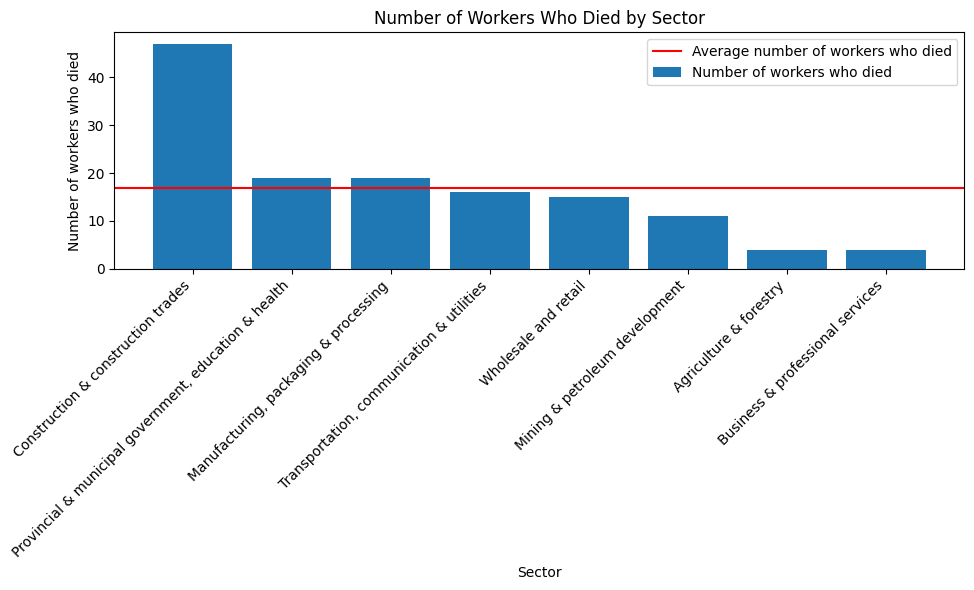

In [243]:
import pandas as pd
import matplotlib.pyplot as plt

df_sort_dead = df.sort_values(by='no_dead_workers', ascending=False)

# Calculate average number of workers who died
average_dead_workers = df['no_dead_workers'].mean()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_sort_dead['Sector'], df_sort_dead['no_dead_workers'], label='Number of workers who died')
plt.axhline(y=average_dead_workers, color='r', linestyle='-', label='Average number of workers who died')

# Adding labels and title
plt.xlabel('Sector')
plt.ylabel('Number of workers who died')
plt.title('Number of Workers Who Died by Sector')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Displaying the plot
plt.tight_layout()
plt.show()


In [244]:
import pandas as pd
import plotly.express as px

# Plotting the bar chart using Plotly
fig = px.bar(df_sort_dead, x='Sector', y='no_dead_workers', color='Sector',
             title='Number of Workers Who Died by Sector',
             labels={'no_dead_workers': 'Number of workers who died', 'Sector': 'Sector'},
             hover_name='Sector', hover_data={'no_dead_workers': True, 'Sector': False})

# Add average line
fig.add_hline(y=average_dead_workers, line_dash="dot", line_color="red", annotation_text=f'Average: {average_dead_workers:.2f}',
              annotation_position="bottom right")

# Update layout
fig.update_layout(width=1000, height=600,
                  xaxis={'categoryorder': 'total descending'},
                  xaxis_title='Sector',
                  yaxis_title='Number of workers',
                  legend_title=None)

# Show plot
fig.show()


c:\Users\towme\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [246]:
# Calculate average number of injured workers who died (in thousands)
average_injured_workers = df['no_injured_workers'].mean() / 1000

# Divide the 'no_injured_workers' column by 1000 to show values in thousands
df['no_injured_workers_thousand'] = df['no_injured_workers']/1000

# Plotting the bar chart using Plotly
fig = px.bar(df, x='Sector', y='no_injured_workers_thousand', color='Sector',
             title='Number of Injured Workers Who Died by Sector',
             labels={'no_injured_workers': 'Number of injured workers who died (in thousands)', 'Sector': 'Sector'},
             hover_name='Sector', hover_data={'no_injured_workers': True, 'Sector': False})

# Add average line (in thousands)
fig.add_hline(y=average_injured_workers, line_dash="dot", line_color="red",
              annotation_text=f'Average: {average_injured_workers:.2f}', annotation_position="bottom right")

# Update layout for descending order and larger plot dimensions
fig.update_layout(width=1000, height=600, xaxis={'categoryorder': 'total descending'},
                  xaxis_title='Sector', yaxis_title='Number of injured workers (in thousands)',
                  legend_title=None)

# Show plot
fig.show()


c:\Users\towme\AppData\Local\Programs\Python\Python312\Lib\site-packages\plotly\express\_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [259]:
import plotly.graph_objects as go

# Sort the DataFrame by male_percentage in descending order
df_sorted = df.sort_values(by='male_percentage', ascending=False)

# Divide the male and female percentages by 100 to convert them to proportions
df['male_percentage'] = df['injuries_by_gender'].apply(lambda x: x['male']) 
df['female_percentage'] = df['injuries_by_gender'].apply(lambda x: x['female']) 

# Calculate average number of injured workers by gender (in thousands)
average_male_percentage = df_sorted['injuries_by_gender'].apply(lambda x: x['male']).mean()
average_female_percentage = df_sorted['injuries_by_gender'].apply(lambda x: x['female']).mean()

# Plotting the bar chart using Plotly
fig = go.Figure()
fig.add_trace(go.Bar(
    x=df_sorted['Sector'],
    y=df_sorted['male_percentage'],
    name='Male',
    marker_color='blue',
    hoverinfo='y+name',
    text=df_sorted['male_percentage'].apply(lambda x: f'{x:.0f}%'),
    textposition='auto'
))
fig.add_trace(go.Bar(
    x=df_sorted['Sector'],
    y=df_sorted['female_percentage'],
    name='Female',
    marker_color='pink',
    hoverinfo='y+name',
    text=df_sorted['female_percentage'].apply(lambda x: f'{x:.0f}%'),
    textposition='auto'
))

# Add average line (in proportions)
fig.add_hline(y=average_male_percentage, line_dash="dot", line_color="blue",
              annotation_text=f'Average Male: {average_male_percentage:.0f}%', annotation_position="bottom right")
fig.add_hline(y=average_female_percentage, line_dash="dot", line_color="pink",
              annotation_text=f'Average Female: {average_female_percentage:.0f}%', annotation_position="top right")

# Update layout for larger plot dimensions and descending order
fig.update_layout(title='Injuries by Gender',
                  xaxis_title='Sector', yaxis_title='Percentage',
                  barmode='group', legend_title='Gender',
                  width=1000, height=600,
                  xaxis={'categoryorder': 'total descending'})  # Sort x-axis in descending order

# Show plot
fig.show()


In [266]:
import plotly.graph_objects as go

# Create lists to store data for the plot
sectors = []
age_groups = []
injury_claims = []

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    sector = row['Sector']
    age_injury_dict = row['age_with_highest_injury_claims']
    for age_group, claims in age_injury_dict.items():
        sectors.append(sector)
        age_groups.append(age_group)
        injury_claims.append(claims)

# Create the bar plot
fig = go.Figure()

# Add bars for each sector
for sector in df['Sector']:
    sector_indeces = [i for i, sec in enumerate(sectors) if sec == sector]
    sector_age_groups = [age_groups[i] for i in sector_indeces]
    sector_claims = [injury_claims[i] for i in sector_indeces]

    fig.add_trace(go.Bar(
        x=[sector],
        y=sector_claims,
        name=sector,
        text=sector_age_groups,  # Annotate bars with age groups
        textposition='auto'
    ))

# Update layout
fig.update_layout(
    title='Age group with highest injury claims by Sector (per 100 person-years)',
    xaxis_title='Sector',
    yaxis_title='Injury Claims (per 100 person-years)',
    barmode='group',
    width=1000,
    height=600,
    xaxis={'categoryorder': 'total descending'}
)

# Show plot
fig.show()


In [395]:
df['injury1']=df["common_types of_injuries"].apply(lambda x:list(x.values())[0])
df['injury2']=df["common_types of_injuries"].apply(lambda x:list(x.values())[1])
df['injury3']=df["common_types of_injuries"].apply(lambda x:list(x.values())[2])

# Sort the DataFrame based on the values of 'injury1' in descending order
df_sorted_common_injury = df.sort_values(by='injury1', ascending=False)

# Plotting the bar chart using Plotly
fig = go.Figure()

# Iterate over the top 3 common injuries
for i, col in enumerate(['injury1', 'injury2', 'injury3']):
    fig.add_trace(go.Bar(
        x=df_sorted_common_injury['Sector'],
        y=df_sorted_common_injury[col],
        name=f'{i+1}st Most Common' if i == 0 else f'{i+1}nd Most Common' if i == 1 else f'{i+1}rd Most Common', 
        hoverinfo='text',
        text=df_sorted_common_injury[col].apply(lambda x: f'{x:.0f}%') + ' ' + df_sorted_common_injury["common_types of_injuries"].apply(lambda x:list(x.keys())[i]),
        textposition='auto',
        offsetgroup=col
    ))

# Update layout for larger plot dimensions and descending order
fig.update_layout(
    title='Top 3 Common Injuries by Sector',
    xaxis_title='Sector',
    yaxis_title='Proportion of Injuries in the Sector',
    barmode='group',
    legend_title='Common Injuries',
    width=1000,
    height=600
)

# Show plot
fig.show()


In [407]:
df["common_types of_injuries"]

0    {'Sprains /  strains / tears': 40, 'Wounds and...
1    {'Sprains /  strains / tears': 51, 'Wounds and...
2    {'Sprains /  strains / tears': 51, 'Wounds and...
3    {'Sprains /  strains / tears': 68, 'Other inju...
4    {'Sprains /  strains / tears': 50, 'Wounds and...
5    {'Sprains /  strains / tears': 52, 'Wounds and...
6    {'Sprains /  strains / tears': 58, 'Other inju...
7    {'Sprains /  strains / tears': 60, 'Other inju...
Name: common_types of_injuries, dtype: object

In [408]:
df['common_parts1']=df["commonly_injured_parts"].apply(lambda x:list(x.values())[0])
df['common_parts2']=df["commonly_injured_parts"].apply(lambda x:list(x.values())[1])
df['common_parts3']=df["commonly_injured_parts"].apply(lambda x:list(x.values())[2])

# Sort the DataFrame based on the values of 'injury1' in descending order
df_sorted_common_parts = df.sort_values(by='common_parts1', ascending=False)

# Plotting the bar chart using Plotly
fig = go.Figure()

# Iterate over the top 3 commonly injured parts
for i, part in enumerate(['common_parts1', 'common_parts2', 'common_parts3']):
    fig.add_trace(go.Bar(
        x=df_sorted_common_parts['Sector'],
        y=df_sorted_common_parts[part],
        name=f'{i+1}st Most Common' if i == 0 else f'{i+1}nd Most Common' if i == 1 else f'{i+1}rd Most Common',
        marker_color='red' if i == 0 else 'green' if i == 1 else 'blue',
        hoverinfo='text',
        text=df_sorted_common_parts[part].apply(lambda x: f'{x:.0f}%') + ' ' + df_sorted_common_parts["commonly_injured_parts"].apply(lambda x:list(x.keys())[i]),
        textposition='auto',
        offsetgroup=part
    ))

# Update layout for larger plot dimensions and descending order
fig.update_layout(
    title='Top 3 Commonly Injured Parts of the Body by Sector',
    xaxis_title='Sector',
    yaxis_title='Proportion of Injuries in the Sector',
    barmode='group',
    legend_title='Commonly Injured Parts',
    width=1000,
    height=600
)

# Show plot
fig.show()


In [381]:
df['top_three_causes']

0    {'Bodily reaction  and exertion': 26, 'Slips, ...
1    {'Bodily reaction  and exertion': 34, 'Slips, ...
2    {'Bodily reaction  and exertion': 32, 'Slips, ...
3    {'Bodily reaction  and exertion': 41, 'Exposur...
4    {'Bodily reaction  and exertion': 36, 'Exposur...
5    {'Exposures to harmful substance': 40, 'Bodily...
6    {'Bodily reaction  and exertion': 40, 'Slips, ...
7    {'Bodily reaction  and exertion': 49, 'Struck ...
Name: top_three_causes, dtype: object

In [409]:
# Extract top three causes
df['cause1'] = df['top_three_causes'].apply(lambda x: list(x.values())[0])
df['cause2'] = df['top_three_causes'].apply(lambda x: list(x.values())[1])
df['cause3'] = df['top_three_causes'].apply(lambda x: list(x.values())[2])

# Sort the DataFrame based on the values of 'injury1' in descending order
df_sorted_causes = df.sort_values(by='cause1', ascending=False)

# Plotting the bar chart using Plotly
fig = go.Figure()

# Iterate over the top 3 commonly injured parts
for i, part in enumerate(['cause1', 'cause2', 'cause3']):
    fig.add_trace(go.Bar(
        x=df_sorted_causes['Sector'],
        y=df_sorted_causes[part],
        name=f'{i+1}st Most Common' if i == 0 else f'{i+1}nd Most Common' if i == 1 else f'{i+1}rd Most Common',
        marker_color='red' if i == 0 else 'green' if i == 1 else 'blue',
        hoverinfo='text',
        text=df_sorted_causes[part].apply(lambda x: f'{x:.0f}%') + ' ' + df_sorted_causes["top_three_causes"].apply(lambda x:list(x.keys())[i]),
        textposition='auto',
        offsetgroup=part
    ))

# Update layout for larger plot dimensions and descending order
fig.update_layout(
    title='Top 3 Causes of Injuries by Sector',
    xaxis_title='Sector',
    yaxis_title='Proportion of Injuries in the Sector',
    barmode='group',
    legend_title='Commonly Injured Parts',
    width=1000,
    height=600
)

# Show plot
fig.show()


In [ ]:
import re


# Initialize lists to store extracted information
workers_died = []
workers_injured = []
injuries_by_gender = []
age_highest_injury_claims = []
commonly_injured_parts = []
top_three_causes = []
common_types_of_injuries = []

# Patterns for extracting information
patterns = {
    'workers_died': r'(\d+)(?=\s*Number\s+of\s+workers\s+who\s+died)', 
    'workers_injured': r'(\d{1,3}(,\d{3})*)(?=\n[iI]njury claims by workers in 2020)',
    'injuries_by_gender': r'(?P<male>\d+)%\n\s*male\s*(?P<female>\d+)%', 
    'age_highest_injury_claims': r'Age\s+with\s+highest\s+injury\s+claims\s*(\d+)',
    'commonly_injured_parts': r'Commonly\s+injured\s+parts\s+of\s+the\s+body\n(.*?)%\s+male',
    'top_three_causes': r'Top three causes of \ninjuries among workers \n([\w\s]+?)\s+(\d+)%\n([\w\s]+?)\s+(\d+)%\n([\w\s]+?)\s+(\d+)%',
    'common_types_of_injuries': r'Common types of injuries\n(.*?)Commonly injured \nparts of the body'
}

# Iterate over each element in the list
for text in m:
    for key, pattern in patterns.items():
        # Use regular expression to find the information
        match = re.search(pattern, text, re.DOTALL)
        if match:
            if key == 'injuries_by_gender':
                injuries_by_gender.append({
                    'male_percentage': match.group(1),
                    'female_percentage': match.group(2)
                    # 'details': match.group(1)
                })
            elif key == 'commonly_injured_parts':
                commonly_injured_parts.append(match.group(1))
            elif key == 'top_three_causes':
                top_three_causes_sub={}
                top_three_causes_sub[match.group(1).strip()] = int(match.group(2))
                top_three_causes_sub[match.group(3).strip()]=  int(match.group(4))
                top_three_causes_sub[match.group(5).strip()] = int(match.group(6))
                top_three_causes.append(top_three_causes_sub)
            elif key == 'common_types_of_injuries':
                injuries_dict ={}
                common_injuries = match.group(1).strip().split('\n')
                common_types_of_injuries.append(match.group(1).strip().split('\n'))
                for injury in common_injuries:
                    parts = injury.split('  ')
                    if len(parts) == 2:
                        name, percentage = parts
                        injuries_dict[name.strip()] = int(percentage.strip('%'))
            else:
                data = match.group(1)
                if '%' in data:
                    data = data.split('%')[0]
                data = data.strip()
                if data.isnumeric():
                    data = int(data)
                globals()[key].append(data)

workers_injured_int = [int(value.replace(',', '')) if isinstance(value, str) else value for value in workers_injured]

# Print the extracted information
print("Number of workers who died:", workers_died)
print("Number of workers injured:", workers_injured_int)
print("Injuries by gender:", injuries_by_gender)
print("Age with highest injury claims:", age_highest_injury_claims)
print("Commonly injured parts of the body:", commonly_injured_parts)
print("Top three causes of injuries among workers:", top_three_causes)
print("Common types of injuries:", common_types_of_injuries)
print("Common types of injuries:", injuries_dict)

Number of workers who died: []
Number of workers injured: []
Injuries by gender: [{'male_percentage': '61', 'female_percentage': '39'}]
Age with highest injury claims: []
Commonly injured parts of the body: []
Top three causes of injuries among workers: []
Common types of injuries: []
Common types of injuries: {'Sprains/ strains/ tears': 53}


In [260]:
df['age_with_highest_injury_claims']

0    {'15-24': 4.76}
1    {'15-24': 2.81}
2    {'25-34': 3.38}
3    {'45-54': 4.72}
4    {'45-54': 3.84}
5    {'35-44': 2.15}
6    {'55-64': 3.61}
7    {'15-24': 5.06}
Name: age_with_highest_injury_claims, dtype: object

In [183]:

data = []
file_names= ['agric']

# Iterate over file names
for file in file_names:
    # Extract text from PDF
    file_text = extract_text_from_pdf(file + "_2022.pdf")
    
    # Extract workers died
    match = re.search(r'Industries\s*(\d+)', file_text)  Industries\s*(\d+)
    workers_died = int(match.group(1)) if match else None
    
    # Extract workers injured
    match = re.search(r'sector([\d,]+)', file_text)
    workers_injured = int(match.group(1).replace(',', '')) if match else None
    
    # Extract injuries by gender
    match = re.search(r'(\d{1,2})%\nmale(\d{1,2})%\nfemale', file_text)
    if match:
        male_percentage = int(match.group(1))
        female_percentage = int(match.group(2))
        injuries_by_gender = {'male': male_percentage, 'female': female_percentage}
    else:
        injuries_by_gender = None
    
    # Extract age with highest injury claims
    match = re.search(r'(\d{2}-\d{2})\s{1,2}year olds\n([\d.]+)', file_text)
    age_highest_injury_claims = {match.group(1): float(match.group(2))} if match else None
    
    # Extract commonly injured parts
    file_text= file_text.replace('\n','')
    pattern = r'100 person-years(.*?)\s(\d+)%(.*?)\s(\d+)%(.*?)\s(\d+)%' 
    matches = re.findall(pattern, file_text)
    commonly_injured_parts = {
        matches[0][0].strip(): int(matches[0][1]),
        matches[0][2].strip(): int(matches[0][3]),
        matches[0][4].strip(): int(matches[0][5])
    } if matches else None
    
    # Extract top three causes of injuries
    pattern = r'Causes(.*?)\s(\d+)%(.*?)\s(\d+)%(.*?)\s(\d+)%' 
    matches = re.findall(pattern, file_text)
    top_three_causes = {
        matches[0][0].strip(): int(matches[0][1]),
        matches[0][2].strip(): int(matches[0][3]),
        matches[0][4].strip(): int(matches[0][5])
    } if matches else None
    
    # Extract common types of injuries
    pattern = r'Types(.*?)\s(\d+)%(.*?)\s(\d+)%(.*?)\s(\d+)%' 
    matches = re.findall(pattern, file_text)
    common_types_of_injuries = {
        matches[0][0].strip(): int(matches[0][1]),
        matches[0][2].strip(): int(matches[0][3]),
        matches[0][4].strip(): int(matches[0][5])
    } if matches else None
    
    # Append extracted data to the list
    data.append({
        'File': file,
        'Workers Died': workers_died,
        'Workers Injured': workers_injured,
        'Injuries by Gender': injuries_by_gender,
        'Age with Highest Injury Claims': age_highest_injury_claims,
        'Commonly Injured Parts': commonly_injured_parts,
        'Top Three Causes': top_three_causes,
        'Common Types of Injuries': common_types_of_injuries
    })

# Create a DataFrame from the collected data
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


    File Workers Died Workers Injured          Injuries by Gender  \
0  agric         None            None  {'male': 65, 'female': 35}   

  Age with Highest Injury Claims Commonly Injured Parts Top Three Causes  \
0                {'15-24': 4.47}                   None             None   

  Common Types of Injuries  
0                     None  


In [174]:
df

,File,Workers Died,Workers Injured,Injuries by Gender,Age with Highest Injury Claims,Commonly Injured Parts,Top Three Causes,Common Types of Injuries
0,agric,None,None,"{'male': 65, 'female': 35}",{'15-24': 4.47},None,None,None
